In [2]:
import numpy as np
import pandas as pd
from importlib import reload
from matplotlib import pylab as plt
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams['text.usetex'] = True

from files.gradient_approximation import *
from files.optimizers import *
from files.sets import *
from files.utils import *
from files.run_experiments import *

%load_ext autoreload
%autoreload 2

In [ ]:
# Для тестирования

def learning_rate(k):
    return 1 / 100

TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**2)
GD.optimize()

make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

## None-stochastic FW LogReg on L2-ball (Mushrooms)

In [30]:
func_name = "LogReg"
sett = L2Ball(radius=1)

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [43]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 20000)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (k + 50000)

def learning_rate_turtle(k):
    return 1 / (k + 5)

In [44]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [45]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:10<00:00,  2.02it/s]


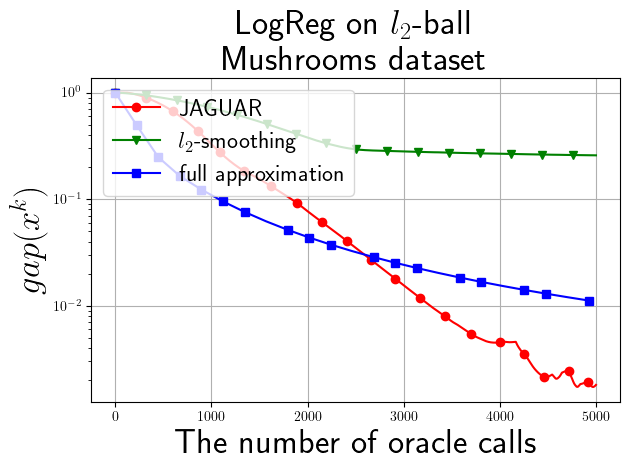

In [47]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L2_Mushrooms")

## None-stochastic FW LogReg on L2-ball (MNIST)

In [48]:
func_name = "LogReg"
sett = L2Ball(radius=1)

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [49]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (k + 50000)

def learning_rate_turtle(k):
    return 3 / (k + 30)

In [50]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [51]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [02:11<00:00, 21.99s/it]


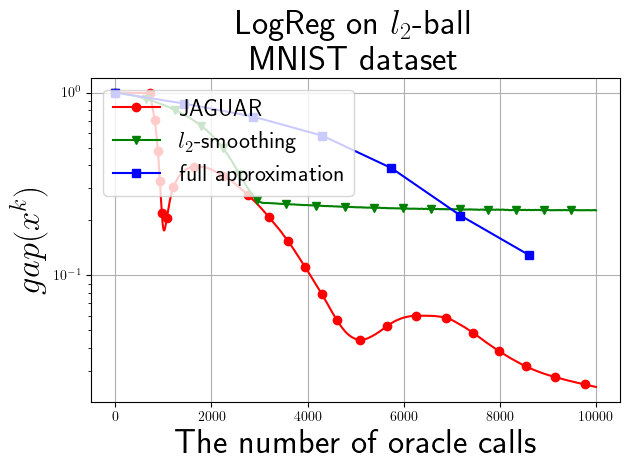

In [52]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L2_MNIST")

## None-stochastic FW Reg on L2-ball

In [53]:
func_name = "Reg"
sett = L2Ball(radius=1)
seed = 42
d = 200
L = 1000
mu = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [96]:
def learning_rate_jaguar(k):
    return 1 / (k + 2000)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 80)

In [97]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [98]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|████████████████████████████████████████| 125/125 [00:01<00:00, 100.37it/s]


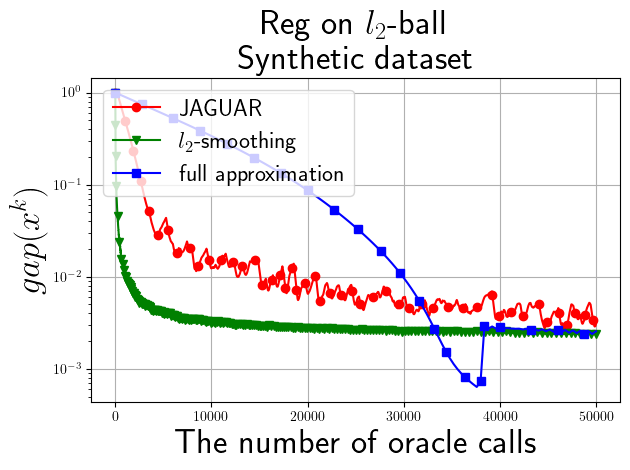

In [99]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_Reg_L2")

## None-stochastic FW SVM on L2-ball (Mushrooms)

In [100]:
func_name = "SVM"
sett = L2Ball(radius=1)

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [101]:
def learning_rate_jaguar(k):
    return 1 / (k + 300)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [102]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [103]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:01<00:00, 37.41it/s]


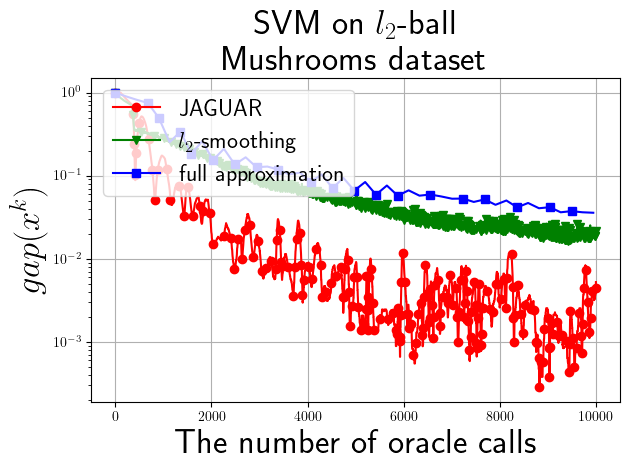

In [104]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L2_Mushrooms")

## None-stochastic FW SVM on L2-ball (MNIST)

In [105]:
func_name = "SVM"
sett = L2Ball(radius=1)

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [132]:
def learning_rate_jaguar(k):
    return 1 / (2 * k + 4000)

def learning_rate_lame(k):
    return 1 / (k + 600)

def learning_rate_turtle(k):
    return 1 / (k + 15)

In [133]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [134]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:08<00:00,  1.45s/it]


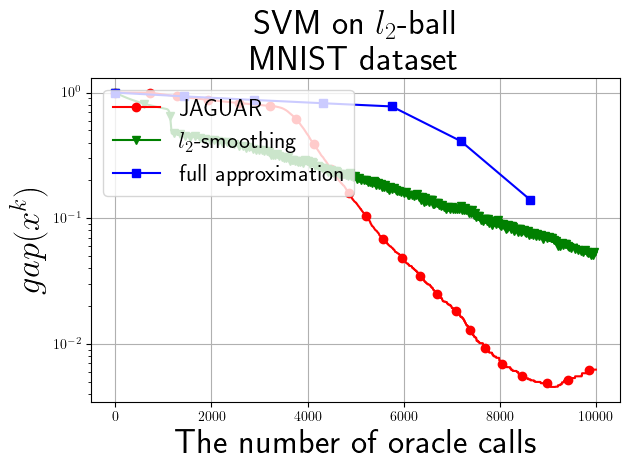

In [135]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L2_MNIST")

## Stochastic OPF FW LogReg on L2-ball (Mushrooms)

In [3]:
func_name = "LogReg"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [6]:
def learning_rate_jaguar(k):
    return 1 / (k + 10)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [7]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [8]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [11]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:18<00:00,  2.35it/s]


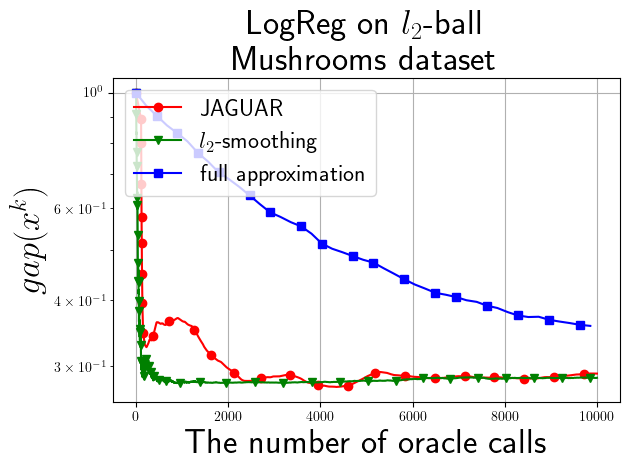

In [12]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L2_Mushrooms")

## Stochastic OPF FW LogReg on L2-ball (MNIST)

In [13]:
func_name = "LogReg"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [32]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (k + 10)

def learning_rate_turtle(k):
    return 1 / (k + 1)

In [33]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [34]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [35]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=3 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 2/2 [00:35<00:00, 17.58s/it]


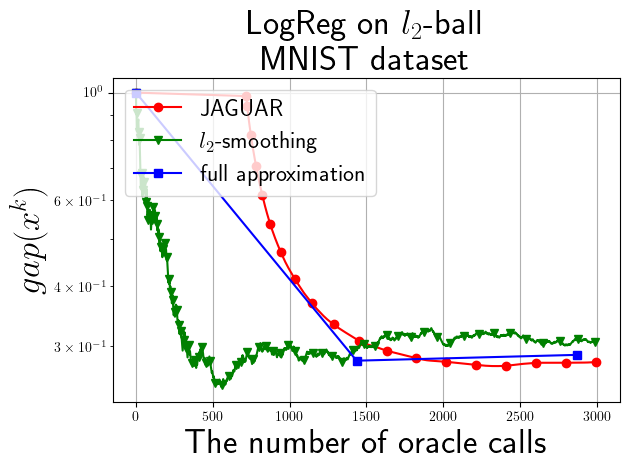

In [36]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L2_MNIST")

## Stochastic OPF FW Reg on L2-ball

In [37]:
func_name = "Reg"
sett = L2Ball(radius=1)
seed = 101
d = 200
L = 1000
mu = 1
sigma = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [64]:
def learning_rate_jaguar(k):
    return 1 / (k + 1)

def learning_rate_lame(k):
    return 1 / (k + 5)

def learning_rate_turtle(k):
    return 1 / (k + 1)

In [81]:
def momentum_k(k):
    return k / (k + 1000)

In [82]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [83]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 85.18it/s]


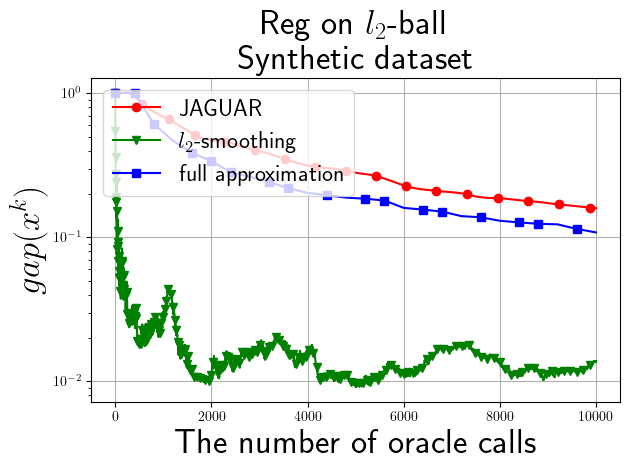

In [84]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_L2")

## Stochastic OPF FW SVM on L2-ball (Mushrooms)

In [85]:
func_name = "SVM"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [123]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 800)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [124]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [125]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [126]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:01<00:00, 35.55it/s]


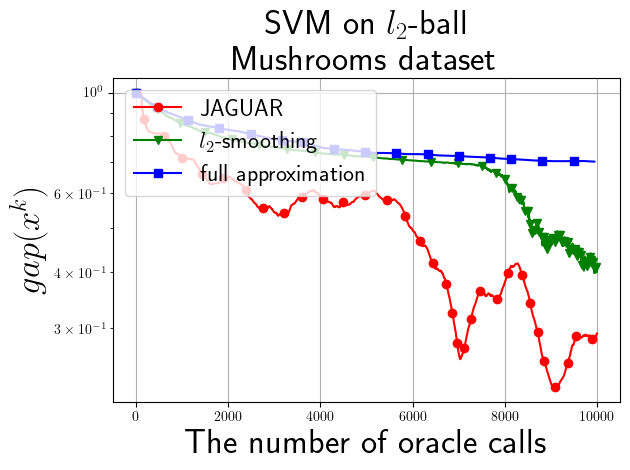

In [127]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L2_Mushrooms")

## Stochastic OPF FW SVM on L2-ball (MNIST)

In [128]:
func_name = "SVM"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [145]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return 1 / (2 * k + 300)

def learning_rate_turtle(k):
    return 1 / (k + 2)

In [146]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [147]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [148]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=6 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


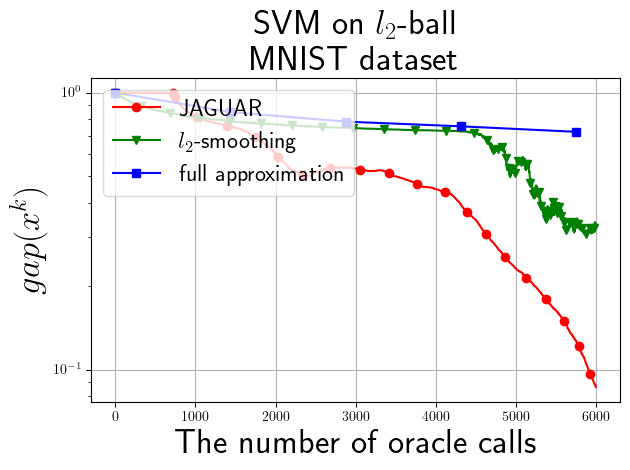

In [149]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L2_MNIST")

## Stochastic TPF FW LogReg on L2-ball (Mushrooms)

In [142]:
func_name = "LogReg"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [148]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 1)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [149]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [150]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [151]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:12<00:00,  1.76it/s]


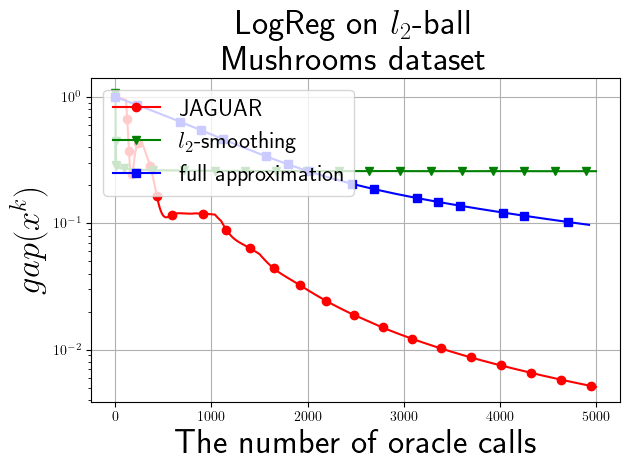

In [152]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L2_Mushrooms")

## Stochastic TPF FW LogReg on L2-ball (MNIST)

In [153]:
func_name = "LogReg"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [154]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 2 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [155]:
def momentum_k(k):
    return k / (k + 1)

In [156]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [157]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [02:08<00:00, 21.39s/it]


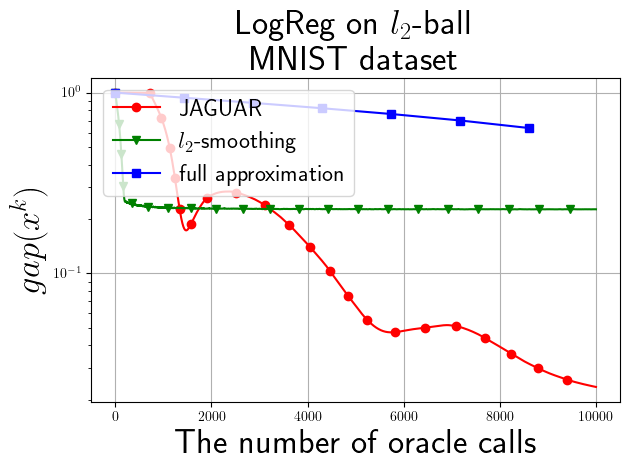

In [158]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L2_MNIST")

## Stochastic TPF FW Reg on L2-ball

In [159]:
func_name = "Reg"
sett = L2Ball(radius=1)
seed = 101
d = 200
L = 1000
mu = 1
sigma = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [160]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [161]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [162]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [163]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 250/250 [00:02<00:00, 89.61it/s]


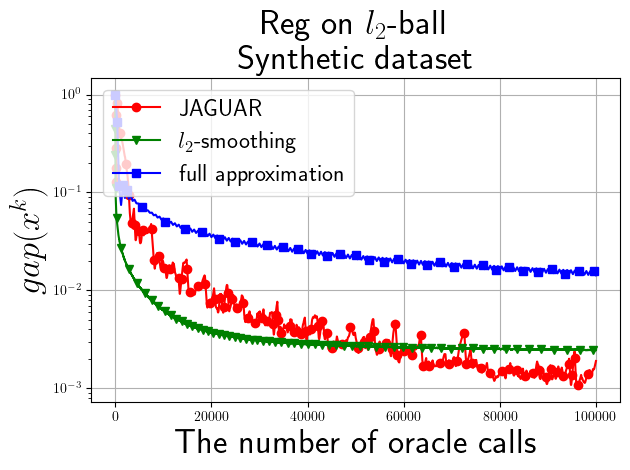

In [164]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_L2")

## Stochastic TPF FW SVM on L2-ball (Mushrooms)

In [248]:
func_name = "SVM"
sett = L2Ball(radius=1)
sigma = 0.5

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=10)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [269]:
def learning_rate_jaguar(k):
    return 1 / (k + 50000)

def learning_rate_lame(k):
    return 1 / (3 * k + 100)

def learning_rate_turtle(k):
    return 1 / (2 * k + 400)

In [270]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [271]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [272]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=8 * 10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 353/353 [00:11<00:00, 31.61it/s]


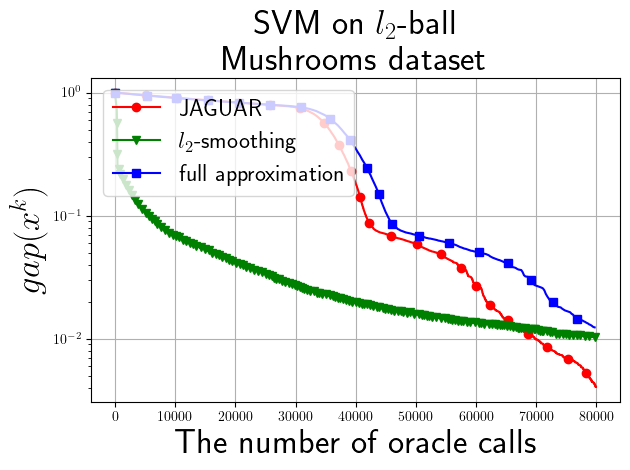

In [273]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L2_Mushrooms")

## Stochastic TPF FW SVM on L2-ball (MNIST)

In [242]:
func_name = "SVM"
sett = L2Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [243]:
def learning_rate_jaguar(k):
    return 1.2 / (k + 9000)

def learning_rate_lame(k):
    return 1 / (2 * k + 1000)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [244]:
def momentum_k(k):
    return k / (k + 10)

In [245]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [246]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=2 * 10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 13/13 [06:32<00:00, 30.17s/it]


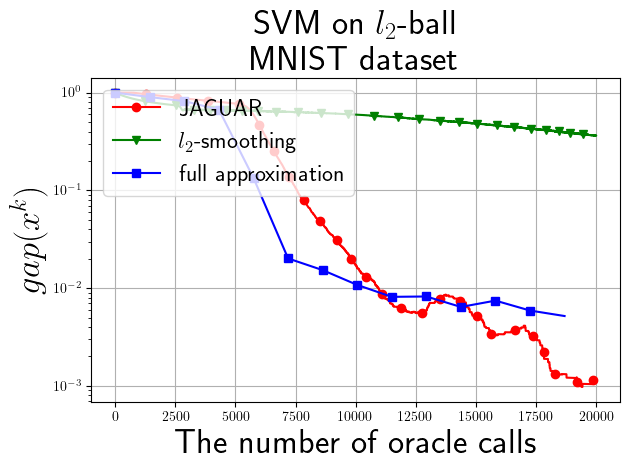

In [247]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L2_MNIST")